### 기획
- 어떤 내용을 시각화 할 것인가
    * 데이터 산업별 시장규모 성장 추이 line
    * 2015, 2021년도 데이터 산업별 구성비 비교 pie
### 설계
- 해당 메시지를 시각화 하기 위해 어떠한 플롯을 어떻게 위치시킬 것인가
- 데이터산업별 규모 추이를 파악할 수 있는 세로 막대 그래프
- 데이터산업별 비중을 파악할 수 있는 원 그래프

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc

current_font_list = matplotlib.rcParams['font.family']

font_path = "C:/Windows/Fonts/H2GTRE.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
# rc('font', family=font)
matplotlib.rcParams['font.family'] = [font]+current_font_list
print(matplotlib.rcParams['font.family'])

['HYGothic-Extra', 'sans-serif']


In [115]:
pd_data = pd.read_csv('데이터산업_시장규모_20230306153111.csv', encoding='cp949')
pd_data.columns[1:]
filter1 = pd_data['시점'] == '2021 e)'
pd_data.loc[filter1,'시점'] = '2021'
pd_data

,시점,데이터 처리 및 관리 솔루션 개발·공급업,데이터 구축 및 컨설팅 서비스업,데이터 판매 및 제공 서비스업
0,2015,14124,55280,64151
1,2016,15720,55850,65977
2,2017,16457,58894,68179
3,2018,18617,61290,75778
4,2019,20805,65412,82364
5,2020,25133,76999,97891
6,2021,30566,86335,114071


C:\Users\ITPS\AppData\Local\Temp\ipykernel_7340\3414988923.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  a.plot(x, y1, 'ro-', label = 'Development and supply of data processing and management solutions', color = 'red')


데이터 처리 및 관리 솔루션 개발·공급업    14124
데이터 구축 및 컨설팅 서비스업         55280
데이터 판매 및 제공 서비스업          64151
Name: 0, dtype: object


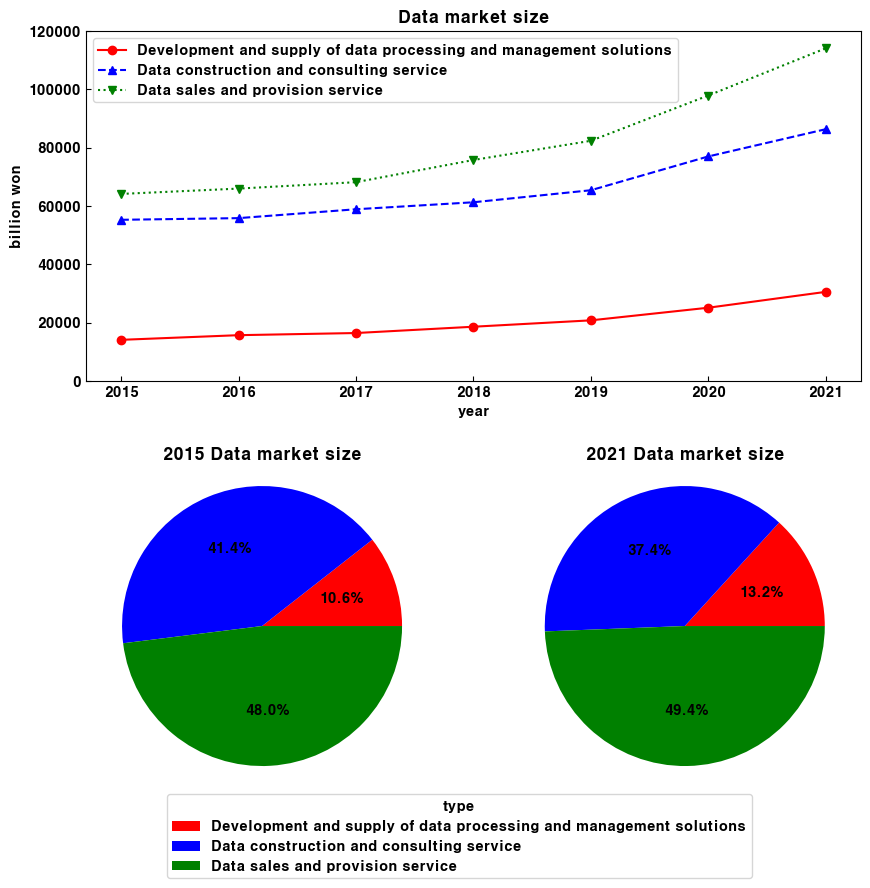

In [119]:
fig = plt.figure(figsize=(10, 10))
x = pd_data['시점']
y1 = pd_data[pd_data.columns[1]]
y2 = pd_data[pd_data.columns[2]]
y3 = pd_data[pd_data.columns[3]]

a = fig.add_subplot(2,1,1)
b = fig.add_subplot(2,2,3)
c = fig.add_subplot(2,2,4)

a.plot(x, y1, 'ro-', label = 'Development and supply of data processing and management solutions', color = 'red')
a.plot(x, y2, '^--', label = 'Data construction and consulting service', color = 'blue')
a.plot(x, y3, 'v:', label = 'Data sales and provision service', color = 'green')
a.tick_params(axis='both', direction='in')
a.set(title = 'Data market size',
      xlabel = 'year', 
      ylabel = 'billion won', yticks = np.linspace(0, 120000, 7))
a.legend()

d1 = pd_data.T
b.pie(d1[1:][0], autopct='%1.1f%%', colors = ['red', 'blue', 'green'])
b.set_title('2015 Data market size', y= 0.95)
wedges, texts, autotexts = c.pie(d1[1:][6], autopct='%1.1f%%', colors = ['red', 'blue', 'green'])
c.set_title('2021 Data market size', y= 0.95)
c.legend(wedges, ['Development and supply of data processing and management solutions','Data construction and consulting service','Data sales and provision service'],
          title="type",
          loc="center left",
          bbox_to_anchor=(-1, -0.6, 0.5, 1))
print(d1[1:][0])